# Exploratory Data Analysis


In [2]:
# Import libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the cleaned data from Phase 1
df = pd.read_csv('../data/heart_disease.csv')
print("Cleaned data loaded")
print(f"Dataset shape: {df.shape}")
df.head()

Cleaned data loaded
Dataset shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
# Basic Information
print("DATASET OVERVIEW")
print("="*50)
print(f"Total patients: {len(df)}")
print(f"Healthy patients (target=0): {len(df[df['target']==0])}")
print(f"Patients with heart disease (target=1): {len(df[df['target']==1])}")
print(f"Percentage with heart disease: {round(len(df[df['target']==1])/len(df)*100, 1)}%")

print("\nBasic statistics:")
df.describe()

DATASET OVERVIEW
Total patients: 303
Healthy patients (target=0): 164
Patients with heart disease (target=1): 139
Percentage with heart disease: 45.9%

Basic statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_27600\1427477770.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


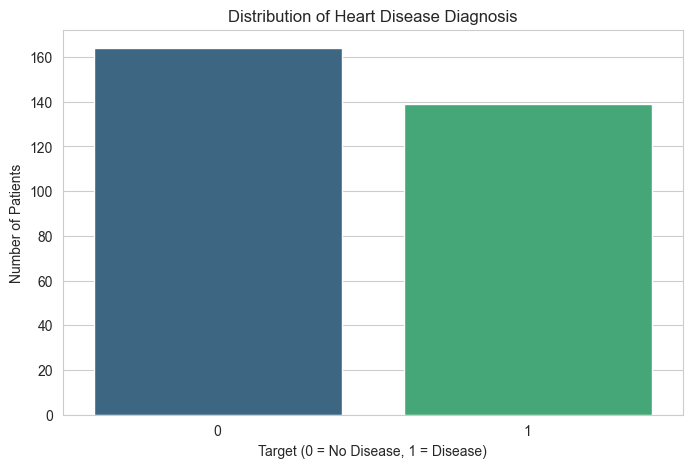

In [4]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Distribution of Heart Disease Diagnosis')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Number of Patients')
plt.show()

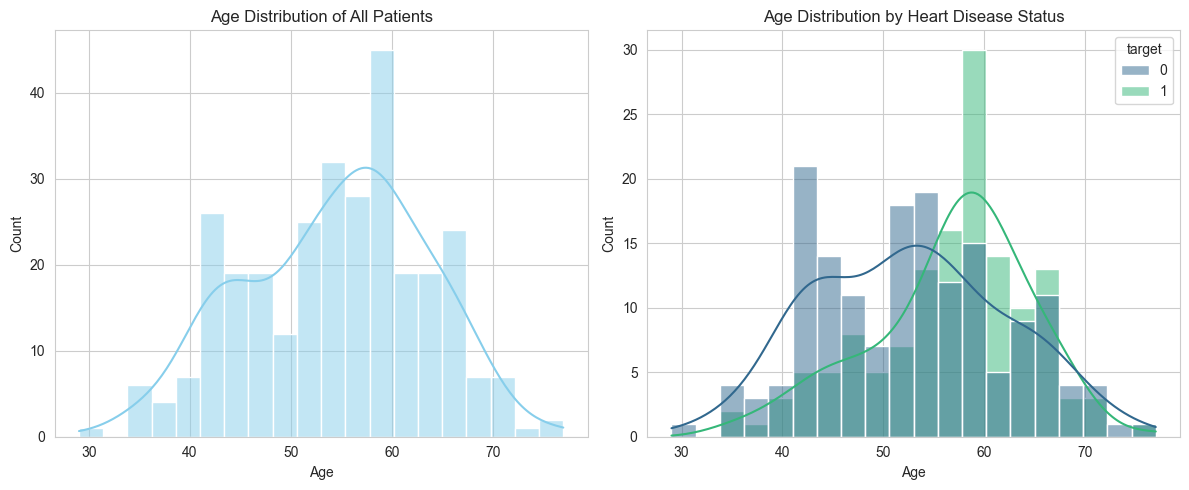

Average age by group:
Healthy patients: 52.6 years
Patients with heart disease: 56.6 years


In [5]:
# Analyze age distribution
plt.figure(figsize=(12, 5))

# Plot 1: Age distribution overall
plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of All Patients')
plt.xlabel('Age')

# Plot 2: Age distribution by heart disease
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='age', hue='target', bins=20, kde=True, palette='viridis')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

# Calculate average age by group
print("Average age by group:")
print(f"Healthy patients: {round(df[df['target']==0]['age'].mean(), 1)} years")
print(f"Patients with heart disease: {round(df[df['target']==1]['age'].mean(), 1)} years")

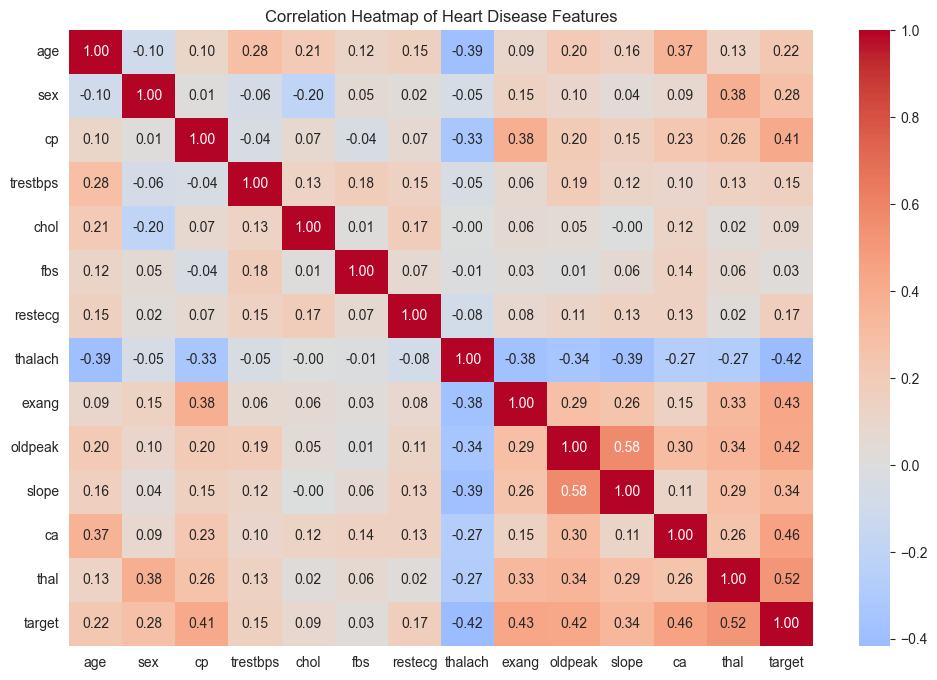

Features most correlated with heart disease (target):
target      1.000000
thal        0.522057
ca          0.460033
exang       0.431894
oldpeak     0.424510
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
thalach    -0.417167
Name: target, dtype: float64


In [6]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap (Important for feature selection)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Heart Disease Features')
plt.show()

# Show features most correlated with target
print("Features most correlated with heart disease (target):")
target_corr = corr_matrix['target'].sort_values(ascending=False)
print(target_corr)

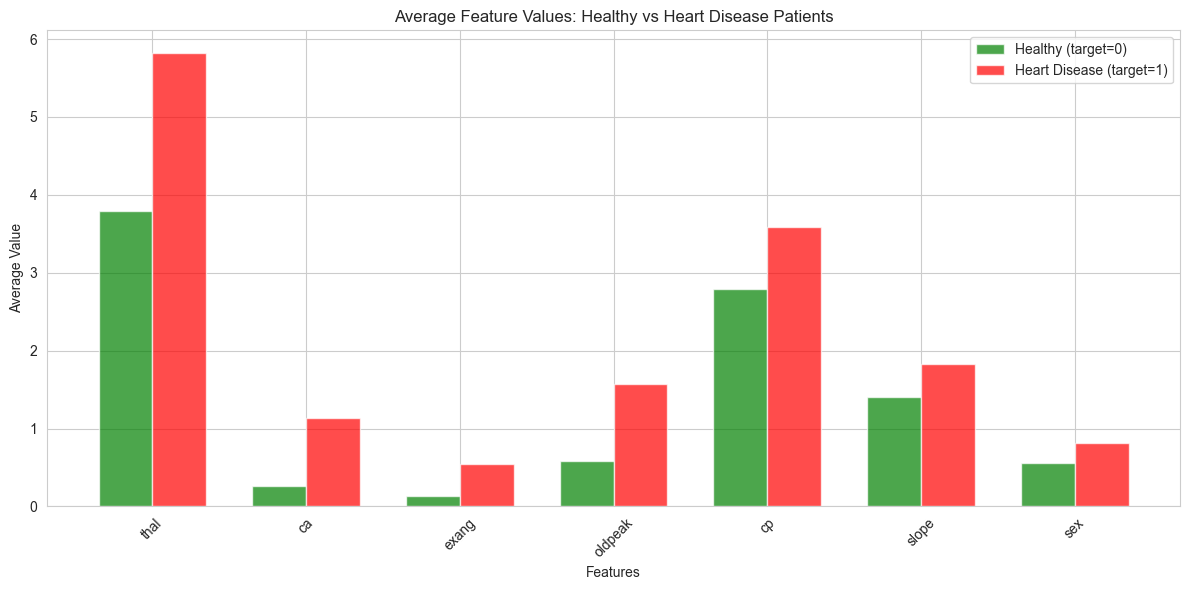

In [7]:
# Calculate the average value for each feature, grouped by heart disease
healthy_means = df[df['target'] == 0].mean()
disease_means = df[df['target'] == 1].mean()

# Get the top positive correlation features
top_features = ['thal', 'ca', 'exang', 'oldpeak', 'cp', 'slope', 'sex']

# Create the plot
plt.figure(figsize=(12, 6))

# Set up the positions
x_pos = np.arange(len(top_features))
width = 0.35

# Create bars
plt.bar(x_pos - width/2, healthy_means[top_features], width, 
        label='Healthy (target=0)', color='green', alpha=0.7)
plt.bar(x_pos + width/2, disease_means[top_features], width, 
        label='Heart Disease (target=1)', color='red', alpha=0.7)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Average Value')
plt.title('Average Feature Values: Healthy vs Heart Disease Patients')
plt.xticks(x_pos, top_features, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

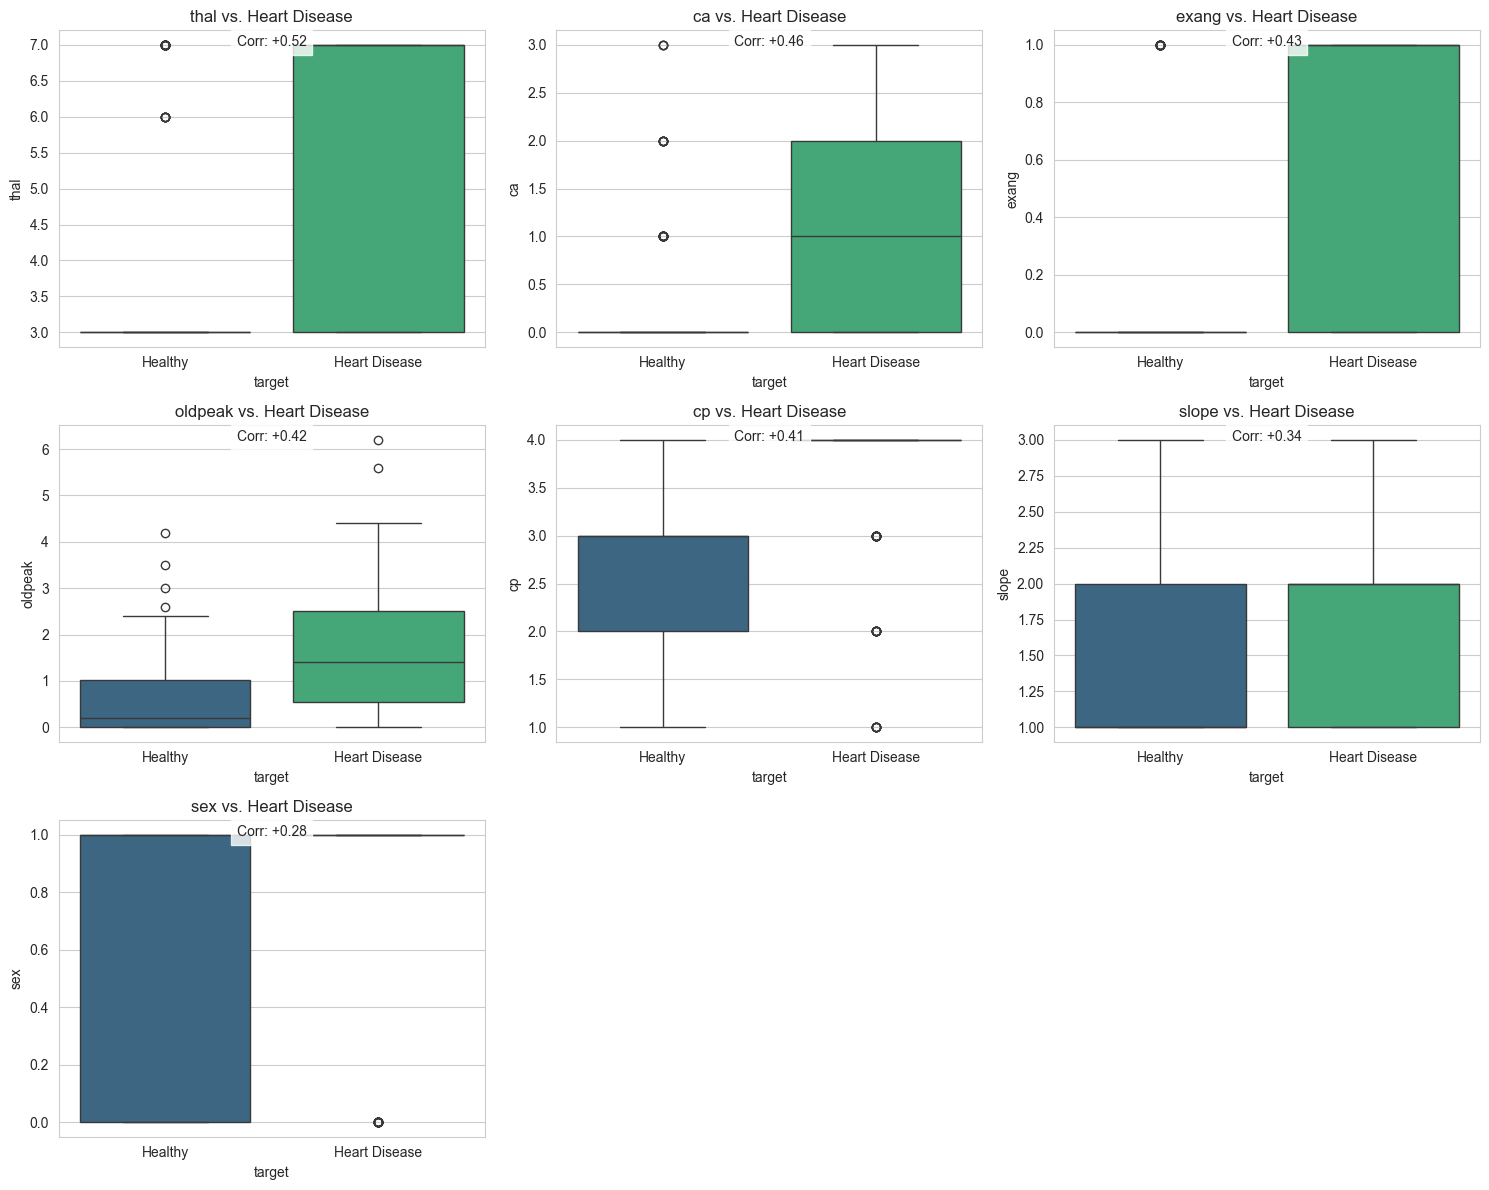

In [8]:
# Using the positive correlation features identified
positive_features = ['thal', 'ca', 'exang', 'oldpeak', 'cp', 'slope', 'sex']

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

# Create a boxplot for each feature
for i, feature in enumerate(positive_features):
    sns.boxplot(x='target', y=feature, data=df, hue='target', 
                palette='viridis', ax=axes[i], legend=False)
    axes[i].set_title(f'{feature} vs. Heart Disease')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Healthy', 'Heart Disease'])
    corr_value = df.corr()['target'][feature]
    axes[i].text(0.5, 0.95, f'Corr: +{corr_value:.2f}', 
                transform=axes[i].transAxes, ha='center', 
                bbox=dict(facecolor='white', alpha=0.8))

# Hide any empty subplots
for i in range(len(positive_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()